In [36]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the files
purchase = pd.read_csv("purchase_behaviour.csv")
transaction = pd.read_csv("transaction_data.csv")
purchase.shape, transaction.shape

((72637, 3), (264836, 8))

In [6]:
print(purchase, transaction)

       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1        

In [7]:
print(purchase.nunique(),"\n \n", transaction.nunique())

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64 
 
 DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64


In [8]:
purchase['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [9]:
purchase['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [10]:
purchase['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [11]:
purchase['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [12]:
transaction['PROD_NAME'].value_counts().sort_values(ascending=False)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [13]:
transaction.groupby(['PROD_NAME'])['TOT_SALES'].sum().sort_values(ascending=False)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64

In [14]:
most_profited = transaction.groupby(['PROD_NAME'])['TOT_SALES'].sum().sort_values(ascending=False).head(3).reset_index()
most_profited

,PROD_NAME,TOT_SALES
0,Dorito Corn Chp Supreme 380g,40352.0
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [15]:
loyal_customers = transaction.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().sort_values(ascending=False).reset_index().head(50)
loyal_customers

,LYLTY_CARD_NBR,TXN_ID
0,172032,18
1,162039,18
2,128178,17
3,230078,17
4,116181,17
5,13138,17
6,129050,16
7,105026,16
8,259100,16
9,113080,16


In [16]:
loyal_customers = loyal_customers.merge(purchase, on='LYLTY_CARD_NBR',how='left')
loyal_customers

,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER
0,172032,18,YOUNG SINGLES/COUPLES,Mainstream
1,162039,18,OLDER FAMILIES,Mainstream
2,128178,17,OLDER FAMILIES,Mainstream
3,230078,17,OLDER FAMILIES,Budget
4,116181,17,YOUNG FAMILIES,Premium
5,13138,17,YOUNG FAMILIES,Mainstream
6,129050,16,YOUNG FAMILIES,Premium
7,105026,16,YOUNG FAMILIES,Budget
8,259100,16,OLDER FAMILIES,Budget
9,113080,16,OLDER FAMILIES,Mainstream


In [17]:
loyal_customer_profile = loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index().sort_values(by='TXN_ID', ascending=False)
loyal_customer_profile

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID
3,OLDER FAMILIES,Mainstream,11
2,OLDER FAMILIES,Budget,8
11,YOUNG FAMILIES,Budget,6
13,YOUNG FAMILIES,Premium,5
5,OLDER SINGLES/COUPLES,Budget,3
4,OLDER FAMILIES,Premium,3
7,OLDER SINGLES/COUPLES,Premium,2
1,MIDAGE SINGLES/COUPLES,Premium,2
12,YOUNG FAMILIES,Mainstream,2
15,YOUNG SINGLES/COUPLES,Mainstream,2


Text(0, 0.5, 'Total Sales')

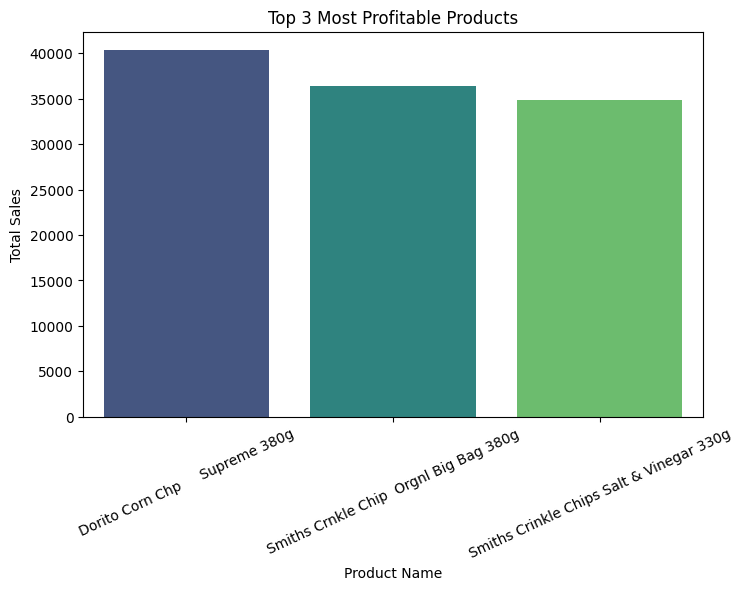

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(data=most_profited, x='PROD_NAME', y='TOT_SALES',hue='PROD_NAME', palette='viridis',legend=False)
plt.xticks(rotation=25)
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")

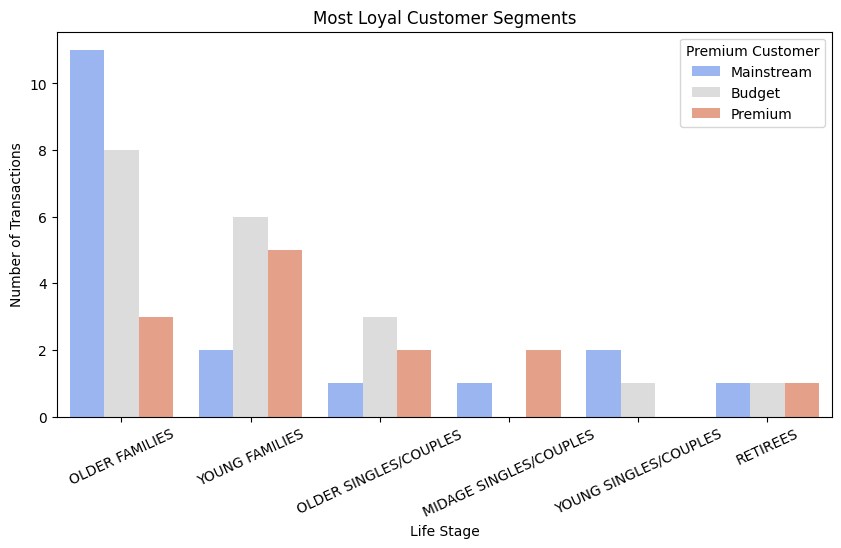

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=loyal_customer_profile, x='LIFESTAGE', y='TXN_ID', hue='PREMIUM_CUSTOMER', palette='coolwarm')
plt.xticks(rotation=25)
plt.title("Most Loyal Customer Segments")
plt.xlabel("Life Stage")
plt.ylabel("Number of Transactions")
plt.legend(title="Premium Customer")
plt.show()